## XGBoost 
Семинар 3

In [3]:
!pip install xgboost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import xgboost

In [7]:
# Import classes and functions we will use for analysis

import numpy as np
import xgboost
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import metrics, neighbors, dummy, preprocessing, svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Import widget functionality

from ipywidgets import *

### Decision Tree

http://xgboost.readthedocs.io/en/latest/model.html


Мы будем использовать набор данных Pine Indian Diabetes из этого репозитория (нужно скачать) - https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes 
Загрузите его и поместите в ту же папку, где лежит ноутбук.

In [10]:
# Load the data - 

dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import scipy

neighbor = OneHotEncoder().fit_transform(LabelEncoder().\
                                          fit_transform(all_data.Neighborhood)[:, np.newaxis])
streets = OneHotEncoder().fit_transform(LabelEncoder().\
                                          fit_transform(all_data.Street)[:, np.newaxis])
features = [('neighbor', neighbor), ('streets', streets)]

X = scipy.sparse.hstack([neighbor, streets])

### Dataset:
https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

### Содержимое на вход:
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 

### Предсказание:
* Diabetes Outcome (Binary 1/0)

In [25]:
# в первом наборе столбцов находятся входные переменные, в последнем столбце - результат
# Мы должны разделить столбцы набора данных на X и Y

Y = dataset[['Outcome']]
X = dataset.drop("Outcome", axis=1)

['Outcome']

In [30]:
type(np.array(Y))
np.array(Y).flatten()

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [90]:
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = cross_validation.train_test_split(np.array(X), np.array(Y).flatten(), test_size=test_size, random_state=seed)
print(X_train.shape)
print(y_train.shape)

(576, 8)
(576,)


In [37]:
# Обучите модель и выведите набор параметров
# fit model no training data
model = xgboost.XGBClassifier(n_jobs = -1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [63]:
from sklearn.grid_search import GridSearchCV

xgb = xgboost.XGBClassifier(n_jobs = -1)
params = {
    'base_score': [0.05, 0.1 , 0.2 , 0.3, 0.5],
    'learning_rate': [0.05, 0.1 , 0.2, 0.3, 0.5, 1],
    'max_delta_step': [0, 0.05, 0.1 , 0.2],
    'max_depth': [1,2,3],
    'min_child_weight': [1,3,5],
    'n_estimators': [10, 50, 100, 200]
}
gsv = GridSearchCV(estimator=xgb, param_grid=params, scoring='precision', cv=3, verbose=1, n_jobs=3)
# splits data in 3 folds to validate
% time gsv.fit(X_train, y_train)

print(gsv.best_params_, gsv.best_score_)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=3)]: Done 134 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done 1334 tasks      | elapsed:   20.7s
[Parallel(n_jobs=3)]: Done 3334 tasks      | elapsed:   46.2s
[Parallel(n_jobs=3)]: Done 6134 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done 9734 tasks      | elapsed:  2.1min


Wall time: 2min 47s
{'base_score': 0.1, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 10} 0.9027777777777778


[Parallel(n_jobs=3)]: Done 12960 out of 12960 | elapsed:  2.8min finished


In [65]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [88]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(xgb, X_train, y_train, scoring=scoring,
                         cv=3, return_train_score=False)

C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

In [89]:
scores

{'fit_time': array([0.03125   , 0.04687786, 0.03124285]),
 'score_time': array([0., 0., 0.]),
 'test_precision_macro': array([0.72294372, 0.70650814, 0.76328502]),
 'test_recall_macro': array([0.72294372, 0.67857143, 0.73593074])}

In [71]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(xgb, X_train, y_train, cv=10)

C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

In [83]:
from sklearn.model_selection import RandomizedSearchCV
log_params = {
    'base_score': [0.05, 0.1 , 0.2 , 0.3, 0.5],
    'learning_rate': [0.05, 0.1 , 0.2, 0.3, 0.5, 1],
    'max_delta_step': [0, 0.05, 0.1 , 0.2],
    'max_depth': [1,2,3],
    'min_child_weight': [1,3,5],
    'n_estimators': [10, 50, 100, 200]
}
search = RandomizedSearchCV(xgb, scoring='recall', cv=10,
                            n_iter=10, param_distributions=log_params,
                            refit=True, n_jobs=-1)
fit = search.fit(X_train, y_train)
clf = search.best_estimator_

In [84]:
predictions = fit.predict(X_test)

C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [68]:
scores.fit

AttributeError: 'dict' object has no attribute 'fit'

In [36]:
# Предскажите результаты.Не забудьте, что итоговый ответ -- бинарный
y_predict = model.predict(X_test)
predictions = [round(value) for value in y_predict]
predictions


C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [85]:
print ('xgboost accuracy=', metrics.accuracy_score(y_test, predictions))
print ('xgboost precision=', metrics.precision_score(y_test, predictions))
print ('xgboost recall=', metrics.recall_score(y_test, predictions))

xgboost accuracy= 0.7708333333333334
xgboost precision= 0.7096774193548387
xgboost recall= 0.6285714285714286


In [54]:
 # посчитайте accuracy, precision,recall, постройте roc-auc
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

import matplotlib.pyplot as plt

In [42]:
n_classes = Y.shape[1]
n_classes

1

In [86]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
roc_auc

0.7405152224824356

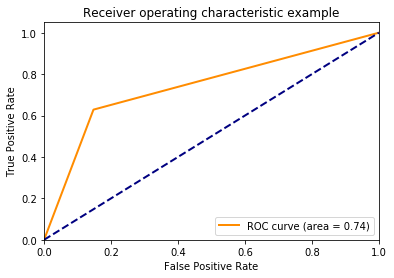

In [87]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [47]:
def ipredict(npreg,gluc,bp,skin,insulin,bmi,diab,age): #по набору фич нужно предсказать, есть ли у пациента диабет
     pass

In [24]:
my_pred = ipredict(2,70,72,35,0,33.6,0.627,36)
print (my_pred)

Model Prediction: No Diabetes
